In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [143]:
path=r'Exercise-6/data/1091402.txt'

In [144]:
df=pd.read_csv(path,
              delim_whitespace=True,
              na_values='-9999',
              usecols=['DATE','TAVG'],
              skiprows=[1])
df['DATE']=df['DATE'].astype(str)
df

,DATE,TAVG
0,19520101,37.00
1,19520102,35.00
2,19520103,33.00
3,19520104,29.00
4,19520105,27.00
...,...,...
23711,20170930,47.00
23712,20171001,47.00
23713,20171002,47.00
23714,20171003,47.00


<Axes: >

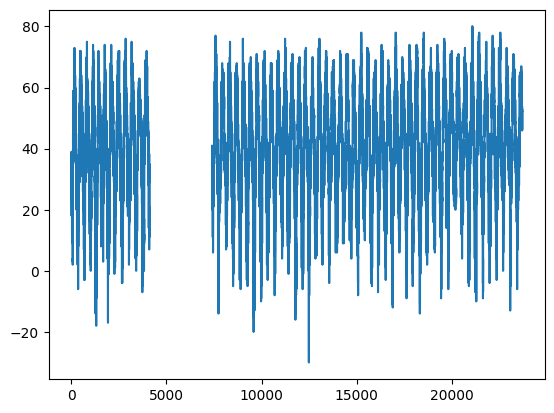

In [145]:
# Plot all data of 'TAVG' with x-axis= 23716, y-axis=data['TAVG']
df['TAVG'].plot()

In [146]:
def tempsConverter(temps):    
    return (temps-32)/1.8
    
def DerivedData(dataset,year,month):
    '''
    Return data with condition given by year - month
    '''
    condiV=year+month
    data = [row for idx,row in dataset.iterrows() if (row['DATE'][0:6]==condiV)]    
    data = pd.DataFrame(data).reset_index(drop=True)
    data['°C'] = data['TAVG'].apply(tempsConverter)
    return data

May_2017=DerivedData(df,'2017','05')
May_2017.head()

,DATE,TAVG,°C
0,20170501,46.00,7.78
1,20170502,47.00,8.33
2,20170503,47.00,8.33
3,20170504,44.00,6.67
4,20170505,50.00,10.00


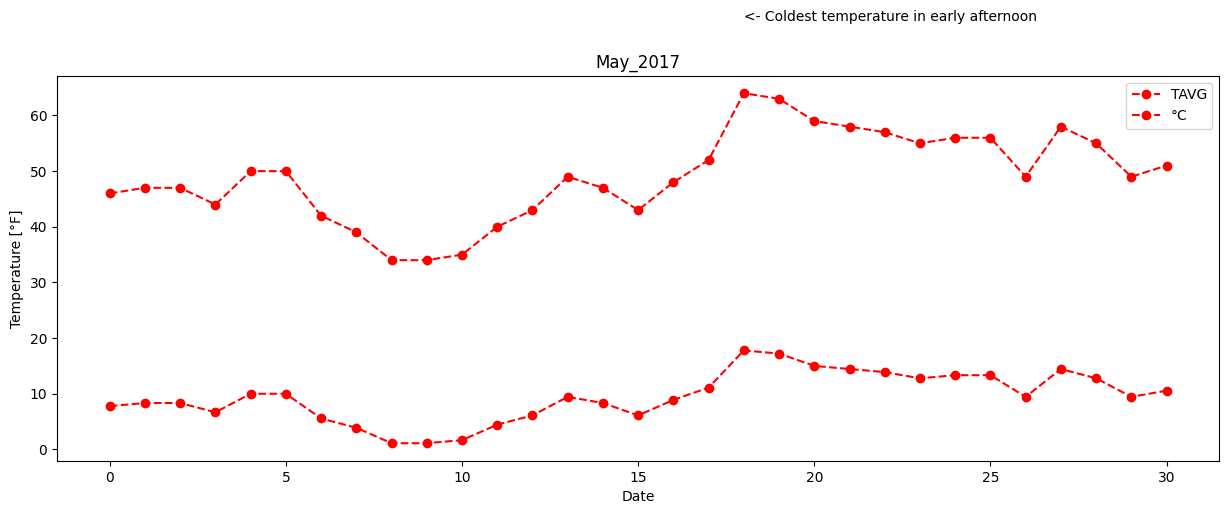

In [147]:
#xticks = [(i+1) for i in range(len(May_2017['DATE']))]
ax = May_2017.plot(style = 'ro--',
             title = 'May_2017',
             xlabel = 'Date',
             ylabel = 'Temperature [°F]',
             #xticks = xticks, # show value - not change value
             figsize = (15,5))

ax.text(18, 77, "<- Coldest temperature in early afternoon")
#Save figure
ax.get_figure().savefig('data/line-plot.png')

In [148]:
import hvplot.pandas
ax = May_2017.hvplot(style = 'ro--',
             title = 'May_2017',
             xlabel = 'Date',
             ylabel = 'Temperature [°F]',
             #xticks = xticks, # show value - not change value
             figsize = (15,5))
ax

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [155]:
May_2017=DerivedData(df,'2017','05')
June_2017=DerivedData(df,'2017','06')
July_2017=DerivedData(df,'2017','07')
August_2017=DerivedData(df,'2017','08')
May_2017.describe()

,TAVG,°C
count,31.00,31.00
mean,49.03,9.46
std,8.01,4.45
min,34.00,1.11
25%,43.50,6.39
50%,49.00,9.44
75%,55.50,13.06
max,64.00,17.78


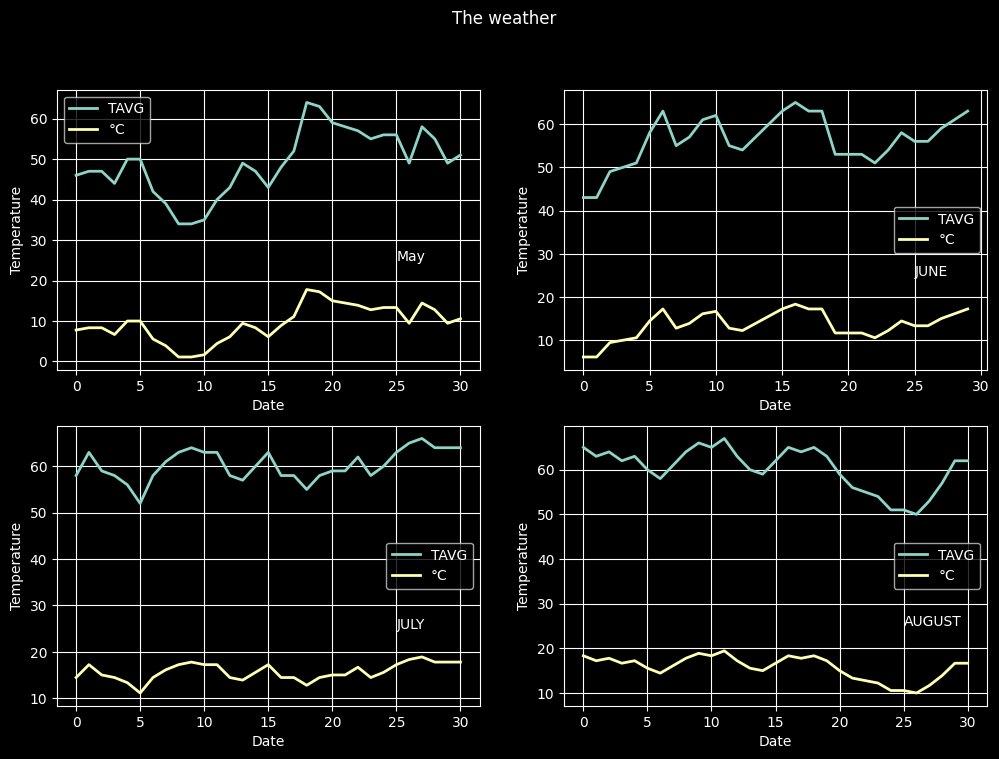

In [172]:
fig, axes = plt.subplots(nrows=2 , ncols=2, figsize=(12,8))
line_width = 2
# Figure Visualization
fig.suptitle('The weather ')
plt.style.use("dark_background")
# Subplot Visualization
ax1 = May_2017.plot(ax=axes[0][0], lw=line_width, grid=True, xlabel='Date', ylabel='Temperature' )
ax2 = June_2017.plot(ax=axes[0][1], lw=line_width, grid=True, xlabel='Date', ylabel='Temperature' )
ax3 = July_2017.plot(ax=axes[1][0], lw=line_width, grid=True, xlabel='Date', ylabel='Temperature')
ax4 = August_2017.plot(ax=axes[1][1], lw=line_width, grid=True, xlabel='Date', ylabel='Temperature')
# Add Month Label
ax1.text(25, 25, "May")
ax2.text(25, 25, "JUNE")
ax3.text(25, 25, "JULY")
ax4.text(25, 25, "AUGUST")
# Save figure
fig.savefig('data/Weather-plot.png')